# Circuit IdealVS_RL1

In [2]:
from dataprocessing.dpsim import *
from dataprocessing.plottools import *
from dataprocessing.timeseries import *

## DPsim EMT

In [13]:
# read EMT results
work_dir = '../../dpsim/Logs/'
log_name = 'EMT_VS_RC1'
print(work_dir + log_name + '.csv')

ts_dpsim_emt = read_timeseries_dpsim(work_dir + log_name + '.csv')

../../dpsim/Logs/EMT_VS_RC1.csv
DPsim results real column names: ['i12', 'v1', 'v2']
DPsim results complex column names: []
DPsim results variable number: 3
DPsim results length: 1000


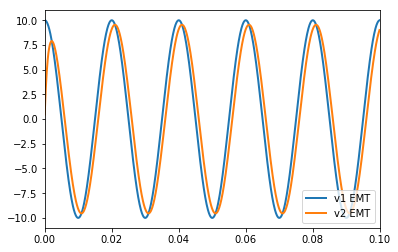

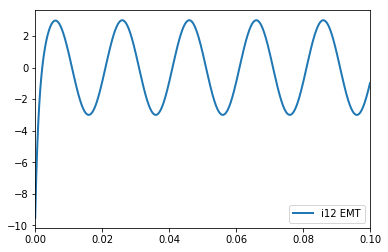

In [14]:
set_timeseries_labels(ts_dpsim_emt['v1'], 'v1 EMT')
set_timeseries_labels(ts_dpsim_emt['v2'], 'v2 EMT')
set_timeseries_labels(ts_dpsim_emt['i12'], 'i12 EMT')
plot_timeseries(1, ts_dpsim_emt['v1'])
plot_timeseries(1, ts_dpsim_emt['v2'])
plot_timeseries(2, ts_dpsim_emt['i12'])

## DPsim DP

In [16]:
# read DPsim DP results
work_dir = '../../dpsim/Logs/'
log_name = 'DP_VS_RC1'
print(work_dir + log_name + '.csv')

ts_dpsim_dp = read_timeseries_dpsim(work_dir + log_name + '.csv')

../../dpsim/Logs/DP_VS_RC1.csv
DPsim results real column names: []
DPsim results complex column names: ['i12', 'v1', 'v2']
DPsim results variable number: 3
DPsim results length: 1000


In [17]:
# convert to emt
ts_dpsim_dp_emt = get_node_emt_voltages(ts_dpsim_dp, 50)

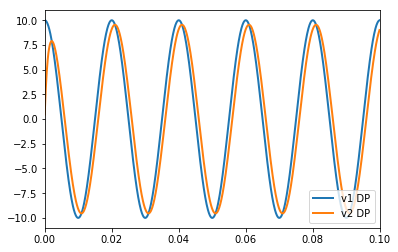

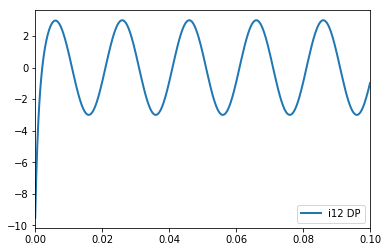

In [18]:
set_timeseries_labels(ts_dpsim_dp_emt['v1'], 'v1 DP')
set_timeseries_labels(ts_dpsim_dp_emt['v2'], 'v2 DP')
set_timeseries_labels(ts_dpsim_dp_emt['i12'], 'i12 DP')
plot_timeseries(1, ts_dpsim_dp_emt['v1'])
plot_timeseries(1, ts_dpsim_dp_emt['v2'])
plot_timeseries(2, ts_dpsim_dp_emt['i12'])

## Simulink reference results

In [19]:
# read Simulink log file
work_dir = '../../results/Simulink/Circuits/'
log_name = 'SL_VS_RC1'
print(work_dir + log_name + '.csv')

ts_sl = read_timeseries_simulink(work_dir + log_name + '.csv')

../../results/Simulink/Circuits/SL_VS_RC1.csv
Simulink results real column names: ['v1', 'v2', 'i12']
Simulink results complex column names: []
Simulink results variable number: 3
Simulink results length: 1001


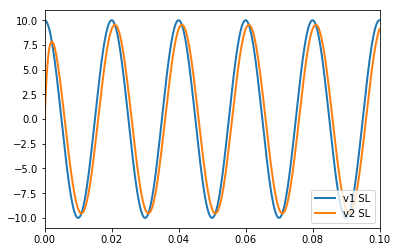

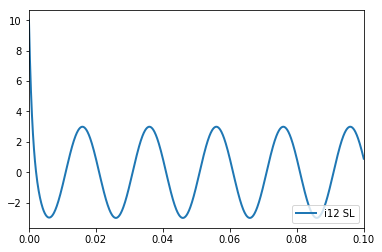

In [20]:
set_timeseries_labels(ts_sl['v1'], 'v1 SL')
set_timeseries_labels(ts_sl['v2'], 'v2 SL')
set_timeseries_labels(ts_sl['i12'], 'i12 SL')
plot_timeseries(1, ts_sl['v1'])
plot_timeseries(1, ts_sl['v2'])
plot_timeseries(2, ts_sl['i12'])

## Comparison

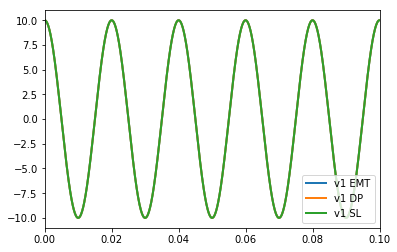

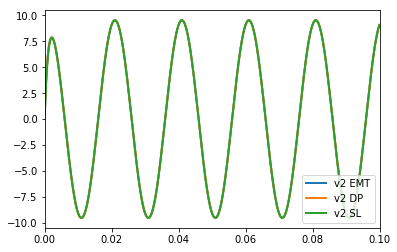

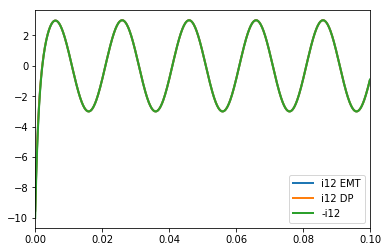

In [21]:
# plot v1
plot_timeseries(1, ts_dpsim_emt['v1'])
plot_timeseries(1, ts_dpsim_dp_emt['v1'])
plot_timeseries(1, ts_sl['v1'])
# plot v2
plot_timeseries(2, ts_dpsim_emt['v2'])
plot_timeseries(2, ts_dpsim_dp_emt['v2'])
plot_timeseries(2, ts_sl['v2'])
# plot i12
plot_timeseries(3, ts_dpsim_emt['i12'])
plot_timeseries(3, ts_dpsim_dp_emt['i12'])
plot_timeseries(3, ts_sl['i12'].scale('-i12', -1))

In [22]:
# calculate the RMSE between Simulink (ts_sl) and EMT (ts_dpsim_emt)
err_sl_emt = 0
err_sl_emt += TimeSeries.rmse(ts_sl['v1'], ts_dpsim_emt['v1'])
err_sl_emt += TimeSeries.rmse(ts_sl['v2'], ts_dpsim_emt['v2'])
err_sl_emt = err_sl_emt / 2
print("Total RMSE of Simulink reference and DPsim EMT: %g" % (err_sl_emt))

# calculate the RMSE between Simulink (ts_sl) and DP (ts_dpsim_dp_emt)
err_sl_dp = 0
err_sl_dp += TimeSeries.rmse(ts_sl['v1'], ts_dpsim_dp_emt['v1'])
err_sl_dp += TimeSeries.rmse(ts_sl['v2'], ts_dpsim_dp_emt['v2'])
err_sl_dp = err_sl_dp / 2
print("Total RMSE of Simulink reference and DPsim DP: %g" % (err_sl_dp))

Total RMSE of Simulink reference and DPsim EMT: 0.0175741
Total RMSE of Simulink reference and DPsim DP: 0.0175708
